<a href="https://colab.research.google.com/github/vasukiup/ProcessSequencePrediction/blob/master/simpleTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

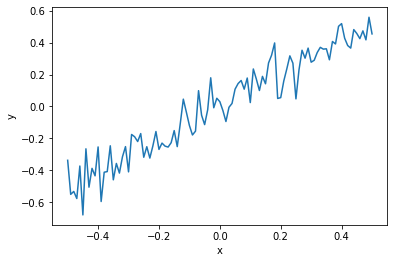

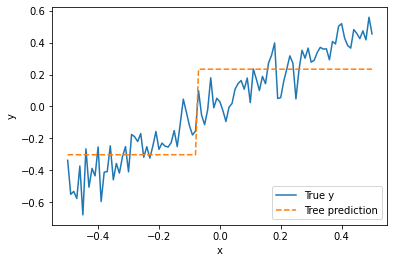

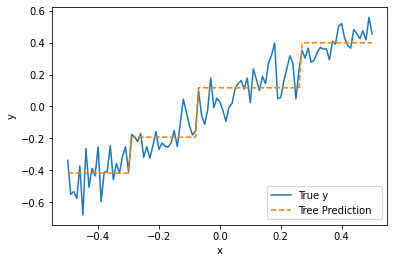

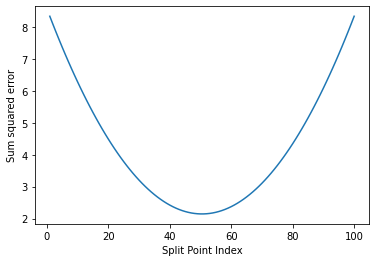

-0.010000000000000009


ValueError: ignored

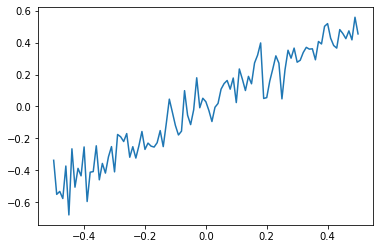

In [19]:
import numpy
import matplotlib.pyplot as plot
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
#from sklearn.externals.six import StringIO

#build a simple data set with y = x + random
nPoints = 100
#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]
#x needs to be list of lists
x = [[s] for s in xPlot]

#y (labels) has random noise added to x-value
#set seed

numpy.random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]

plot.plot(xPlot, y)
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show()

simpleTree = DecisionTreeRegressor(max_depth=1)
simpleTree.fit(x, y)

#draw the tree
with open("simpleTree.dot", 'w') as f:
  f = tree.export_graphviz(simpleTree, out_file=f)

# draw the tree
yHat = simpleTree.predict(x)

plot.figure()
plot.plot(xPlot, y, label='True y')
plot.plot(xPlot, yHat, label = 'Tree prediction', linestyle = '--')
plot.legend(bbox_to_anchor=(1,0.2))
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show()

simpleTree2 = DecisionTreeRegressor(max_depth=2)
simpleTree2.fit(x,y)
# draw the tree
with open('SimpleTree2.dot', 'w') as f:
    f= tree.export_graphviz(simpleTree2, out_file=f)

#compare prediction from tree with true values
yHat = simpleTree2.predict(x)
plot.figure()
plot.plot(xPlot, y, label='True y')
plot.plot(xPlot, yHat, label='Tree Prediction  ', linestyle='--')
plot.legend(bbox_to_anchor=(1,0.2))
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show()

#split point calculations - try every possible split point to find the best one

sse = []
xMin =[]
for i in range (1, len(xPlot)):
  #divide list into points on left and riht of split point
  lhList = list(xPlot[0:i])
  rhList = list(xPlot[i:len(xPlot)])

  #calclate averages on each side
  lhAvg = sum(lhList)/len(lhList)
  rhAvg = sum(rhList)/len(rhList)

  # calculate sum square error on left, right and total
  lhSse = sum([(s-lhAvg) * (s-lhAvg) for s in lhList])
  rhSse = sum([(s-rhAvg) * (s-rhAvg) for s in rhList])

  #add sum of left and right to list of errors
  sse.append(lhSse + rhSse)
  xMin.append(max(lhList))
plot.plot(range(1, len(xPlot)), sse)
plot.xlabel('Split Point Index')
plot.ylabel('Sum squared error')
plot.show()

minSse = min(sse)
idxMin = sse.index(minSse)
print (xMin[idxMin])

#what happens if the depth is really high?
simpleTree6 = DecisionTreeRegressor(max_depth=6)
simpleTree6.fit(x, y)

#too many nodes to draw the tree
#with open ("SimpleTree2.dot", 'w') as f:
# f=tree.explort_graphviz(simpleTree6, out_file=f)

#compare prediction from tree with true values

yHat = simpleTree6
plot.figure()
plot.plot(xPlot, y, label='True y')
plot.plot(xPlot, yHat, label='Tree Prediction ', linestyle='-')
plot.legend(bbox_to_anchor=(1, 0.2))
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show()